In [1]:
import numpy as np
import matplotlib.pyplot as plt
from river import drift
from sklearn.datasets import make_classification

In [2]:
# Function to simulate a 2D classification data stream with drift
def generate_data():
    X, y = make_classification(n_samples=3000, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=42)
    # Introducing drift by modifying the data
    X[1000:2000, :] = X[1000:2000, :] * np.array([0.5, 1.5]) + np.array([0.1, -0.1])
    X[2000:, :] = X[2000:, :] * np.array([1.5, 0.5]) - np.array([0.1, 0.1])
    return X, y

X, y = generate_data()

In [3]:
X, y

(array([[-0.31269709, -1.8924984 ],
        [ 1.19465312, -1.67024747],
        [-0.35826855, -1.95252482],
        ...,
        [ 1.47880961,  0.05630786],
        [ 1.3901996 , -0.06661172],
        [ 0.15742926, -0.8514929 ]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [13]:
# Plotting function for the data
def plot_data(X, drifts):
    plt.figure(figsize=(12, 6))
    for i in range(X.shape[1]):
        print(str(i) + " --- " + str(X.shape[1]))
        plt.subplot(1, X.shape[1], i+1)
        plt.plot(X[:, i], label=f'Feature {i+1}')
        if drifts[i]:
            for d in drifts[i]:
                plt.axvline(d, color='red')
        plt.legend()
    plt.show()

Drift detected in feature 1 at index 1151
Drift detected in feature 1 at index 2079
0 --- 2
1 --- 2


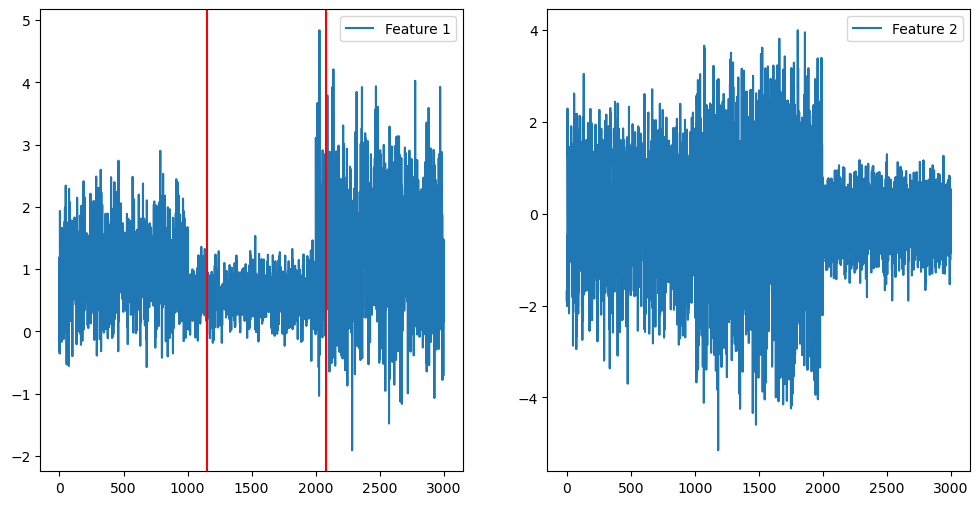

In [15]:
# Create ADWIN drift detectors for each feature
drift_detectors = [drift.ADWIN() for _ in range(X.shape[1])]
drifts = [[] for _ in range(X.shape[1])]

# Process the stream
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        drift_detectors[j].update(X[i, j])
        if drift_detectors[j].drift_detected:
            print(f'Drift detected in feature {j+1} at index {i}')
            drifts[j].append(i)



plot_data(X, drifts)


In [10]:
# Create ADWIN drift detectors for each feature
drift_detectors = [drift.KSWIN() for _ in range(X.shape[1])]
drifts = [[] for _ in range(X.shape[1])]

# Process the stream
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        drift_detectors[j].update(X[i, j])
        if drift_detectors[j].drift_detected:
            print(f'Drift detected in feature {j+1} at index {i}')
            drifts[j].append(i)



plot_data(X, drifts)

Drift detected in feature 2 at index 413
Drift detected in feature 1 at index 754
Drift detected in feature 1 at index 1016
Drift detected in feature 2 at index 1265
Drift detected in feature 1 at index 1319
Drift detected in feature 2 at index 1676
Drift detected in feature 1 at index 1922
Drift detected in feature 2 at index 2018
Drift detected in feature 1 at index 2022
Drift detected in feature 2 at index 2455
Drift detected in feature 1 at index 2905


TypeError: unsupported operand type(s) for +: 'int' and 'str'

<Figure size 1200x600 with 0 Axes>

Drift detected in feature 1 at index 299
Drift detected in feature 2 at index 299
Drift detected in feature 1 at index 599
Drift detected in feature 2 at index 599
Drift detected in feature 1 at index 899
Drift detected in feature 2 at index 899
Drift detected in feature 1 at index 1199
Drift detected in feature 2 at index 1199
Drift detected in feature 1 at index 1499
Drift detected in feature 2 at index 1499
Drift detected in feature 1 at index 1799
Drift detected in feature 2 at index 1799
Drift detected in feature 1 at index 2099
Drift detected in feature 2 at index 2099
Drift detected in feature 1 at index 2399
Drift detected in feature 2 at index 2399
Drift detected in feature 1 at index 2699
Drift detected in feature 2 at index 2699
Drift detected in feature 1 at index 2999
Drift detected in feature 2 at index 2999
0
1


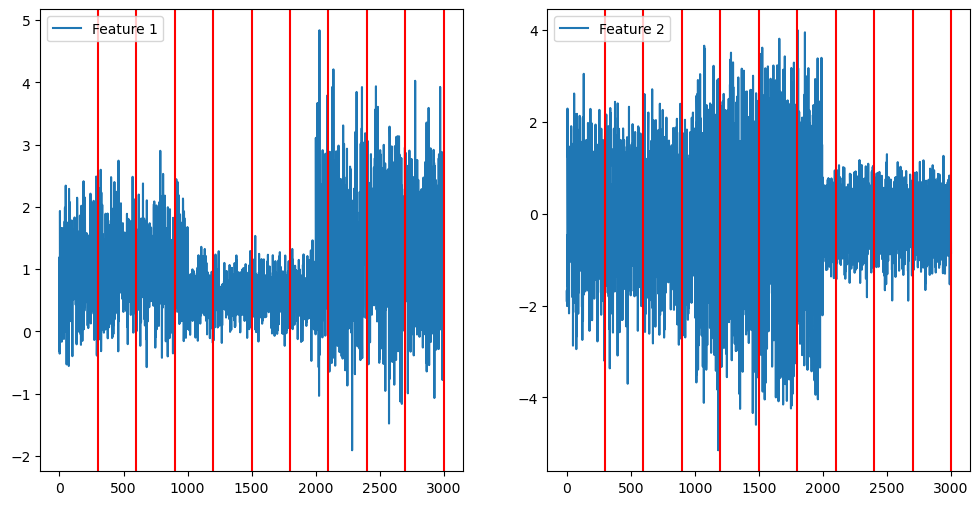

In [7]:
# Create ADWIN drift detectors for each feature
drift_detectors = [drift.DummyDriftDetector() for _ in range(X.shape[1])]
drifts = [[] for _ in range(X.shape[1])]

# Process the stream
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        drift_detectors[j].update(X[i, j])
        if drift_detectors[j].drift_detected:
            print(f'Drift detected in feature {j+1} at index {i}')
            drifts[j].append(i)



plot_data(X, drifts)

Drift detected in feature 1 at index 1099
Drift detected in feature 2 at index 1155
Drift detected in feature 2 at index 1277
Drift detected in feature 2 at index 1570
Drift detected in feature 2 at index 1712
Drift detected in feature 1 at index 2056
0
1


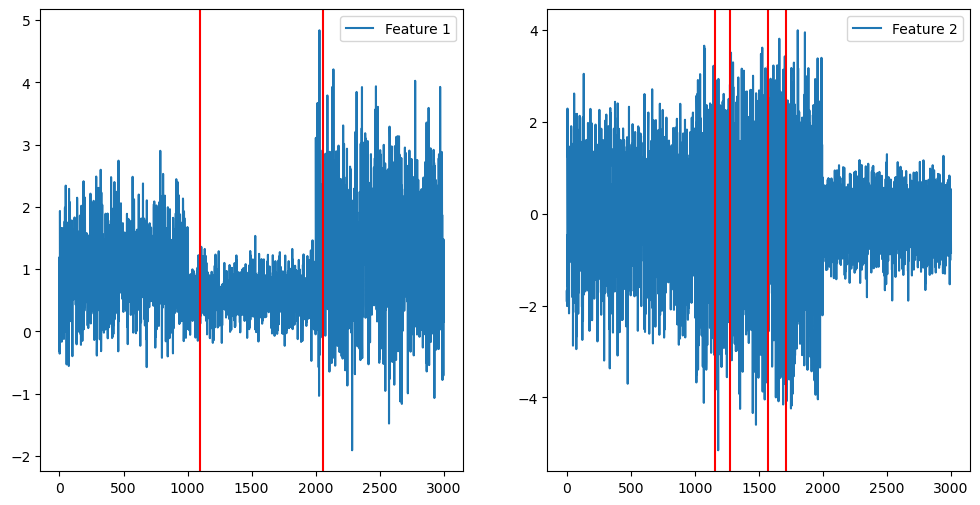

In [8]:
# Create ADWIN drift detectors for each feature
drift_detectors = [drift.PageHinkley() for _ in range(X.shape[1])]
drifts = [[] for _ in range(X.shape[1])]

# Process the stream
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        drift_detectors[j].update(X[i, j])
        if drift_detectors[j].drift_detected:
            print(f'Drift detected in feature {j+1} at index {i}')
            drifts[j].append(i)



plot_data(X, drifts)